In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import glob
import datetime
from joblib import Parallel, delayed
from neuraltda import simpComp as sc
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

homedir = os.path.expanduser('~')
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = os.path.join(homedir, 'DailyLog/'+daystr+'/')
print(figsavepth)
plt.style.use(os.path.join(homedir, 'code/NeuralTDA/gentnerlab.mplstyle'))

/home/AD/btheilma/DailyLog/20190404/


In [44]:
## Measure the amount of spectrum > threshold at different betas

thresh = 1e-14
def spectral_proportion(lapspectrum, beta, thresh):
    
    rspectra = np.exp(-beta*lapspectrum)
    numabove = np.sum(rspectra > thresh)
    return float(numabove)/ float(len(lapspectrum))

def get_lapfile_params(lapfile):
    lap_filename = os.path.splitext(os.path.split(lapfile)[-1])[0]
    params = lap_filename.split('Lapsectra_')[-1].split('-')
    fam = params[-1]
    shuf = params[-2]
    ntrials = params[-3]
    bird = params[-4]
    return {'bird': bird, 'ntrials': ntrials, 'shuf': shuf, 'fam': fam}

In [45]:
betas = np.logspace(-1, 2)
nstim = 4
ntrials=20

lap_path = os.path.join(homedir, 'laplacians/Lapspectra*.pkl')
m_path = os.path.join(homedir, 'laplacians/Mspectra*.pkl')


lap_files = glob.glob(lap_path)
m_files = glob.glob(m_path)

file_pairs = []
for lap_file in lap_files:
    lap_filename = os.path.split(lap_file)[-1]
    params = lap_filename.split('Lapspectra')[-1]
    m_files = glob.glob(os.path.join(homedir, 'laplacians/'+'Mspectra'+params))
    if m_files:
        file_pairs.append((lap_file, m_files[0]))

file_pairs = sorted(file_pairs)
print(file_pairs)

[('/home/AD/btheilma/laplacians/Lapspectra_B1056-20-original-familiar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1056-20-original-familiar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1056-20-original-unfamiliar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1056-20-original-unfamiliar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1056-20-shuffled-familiar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1056-20-shuffled-familiar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1056-20-shuffled-unfamiliar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1056-20-shuffled-unfamiliar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1083-20-original-familiar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1083-20-original-familiar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1083-20-original-unfamiliar.pkl', '/home/AD/btheilma/laplacians/Mspectra_B1083-20-original-unfamiliar.pkl'), ('/home/AD/btheilma/laplacians/Lapspectra_B1083-20-shuffled-familiar.pkl', '/home/AD/btheilma/lapla

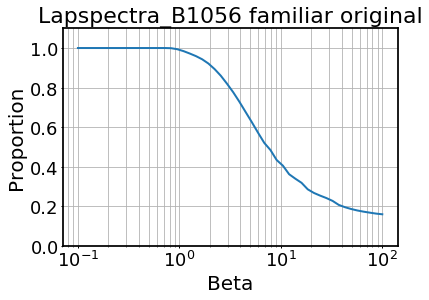

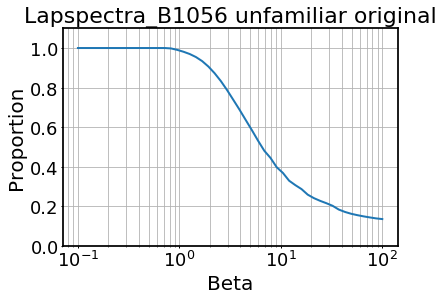

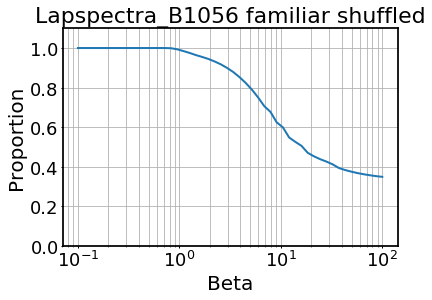

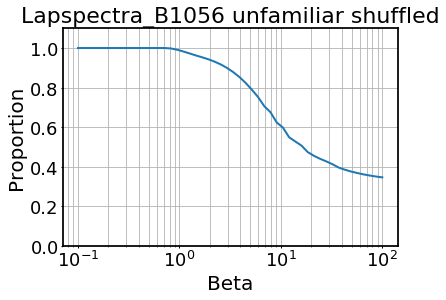

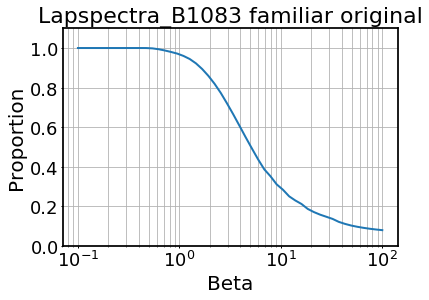

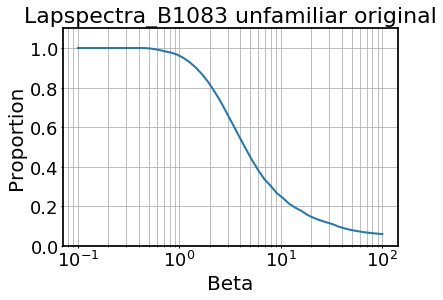

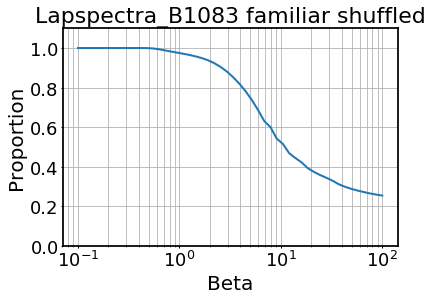

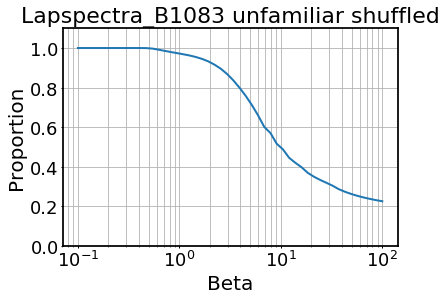

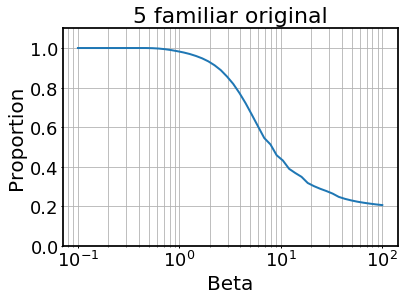

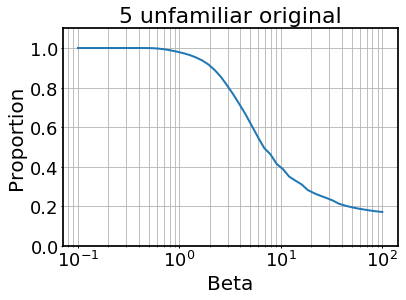

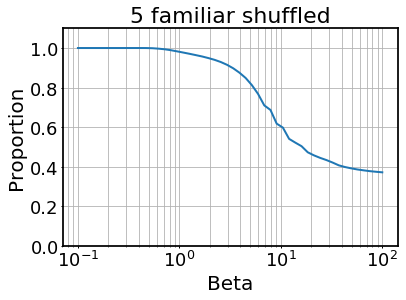

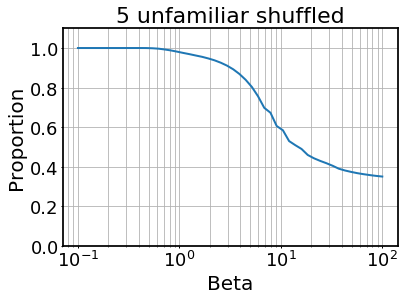

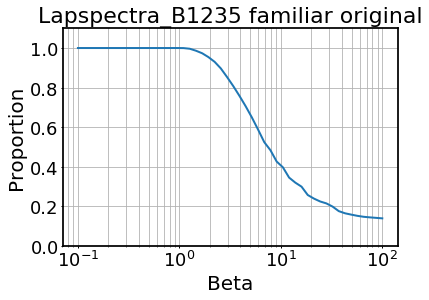

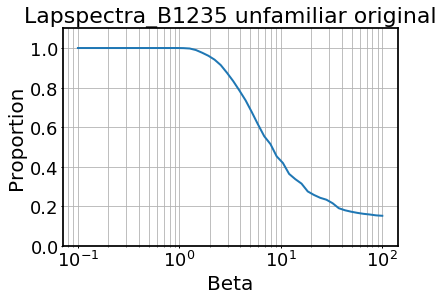

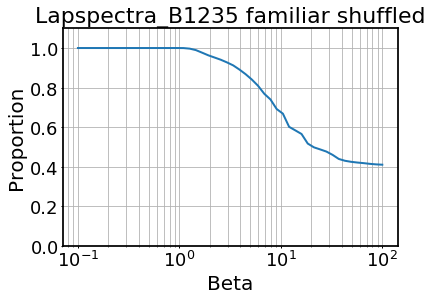

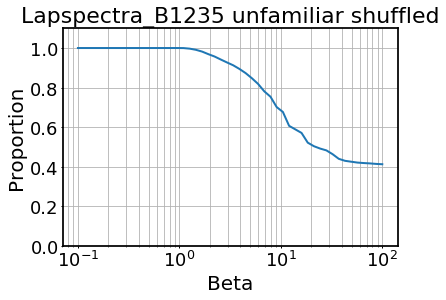

In [46]:
betas = np.logspace(-1, 2, 50)
for pair in file_pairs:
    lap_file = pair[0]
    params = get_lapfile_params(lap_file)
    with open(lap_file, 'rb') as f:
        lapspectra = pickle.load(f)
    props = np.zeros((len(betas), len(lapspectra)))
    for ind, lapspectrum in enumerate(lapspectra):    
        lapspectrum = np.array(lapspectrum)
        props[:, ind] = np.array([spectral_proportion(lapspectrum, beta, thresh) for beta in betas])
    
    
    plt.figure()
    plt.semilogx(betas, np.mean(props, axis=1))
    plt.xlabel('Beta')
    plt.ylabel('Proportion')
    plt.ylim([0, 1.1])
    plt.title('{} {} {}'.format(params['bird'], params['fam'], params['shuf']))
    plt.grid(which='both')

/home/AD/btheilma/laplacians/Mspectra_B1056-20-original-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1056-20-original-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1056-20-shuffled-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1056-20-shuffled-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-20-original-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-20-original-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-20-shuffled-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-20-shuffled-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-5-20-original-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-5-20-original-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-5-20-shuffled-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1083-5-20-shuffled-unfamiliar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1235-20-original-familiar.pkl
/home/AD/btheilma/laplacians/Mspectra_B1235-20-original-unfamiliar.pkl
/home/AD/bth

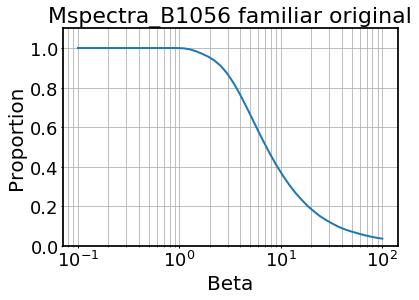

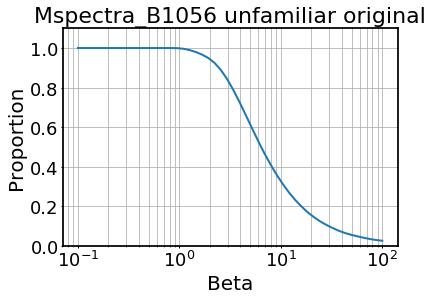

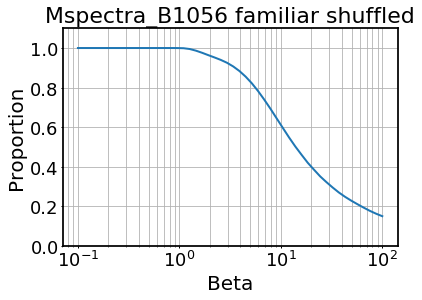

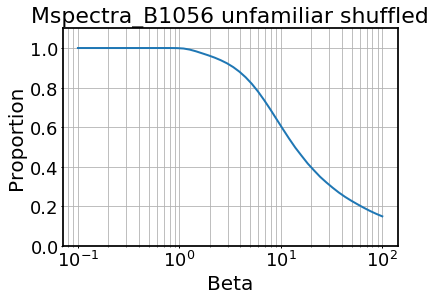

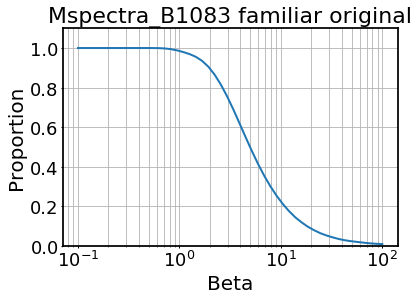

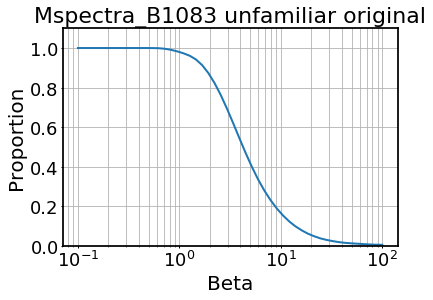

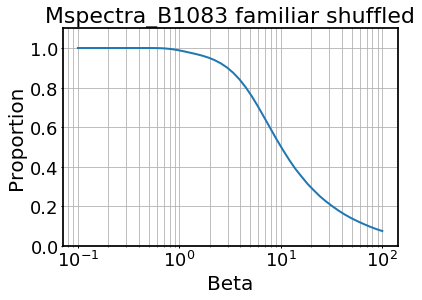

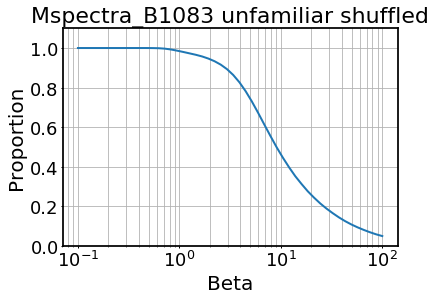

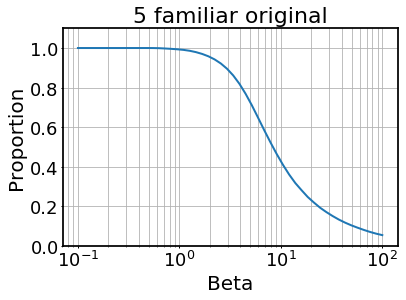

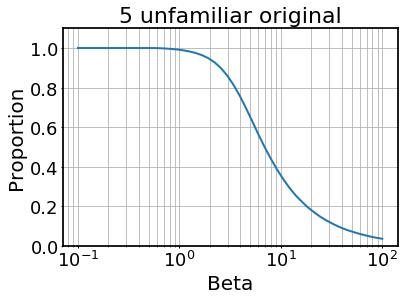

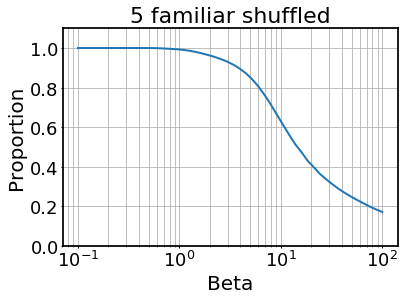

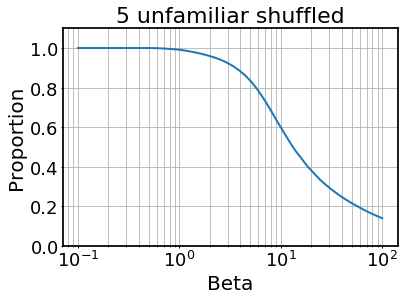

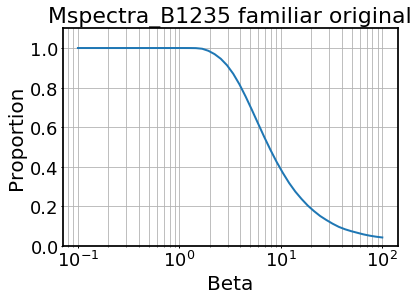

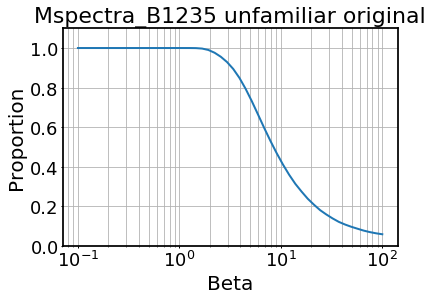

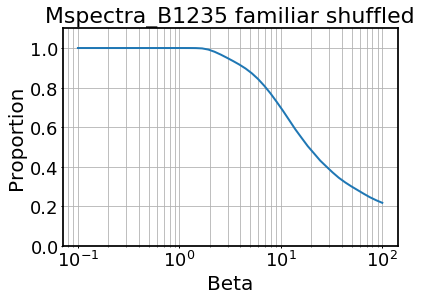

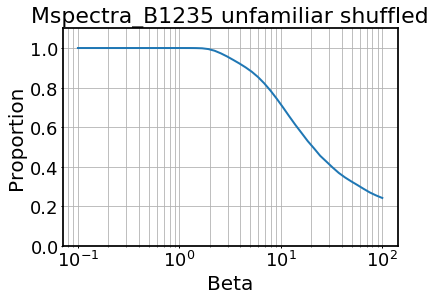

In [40]:
betas = np.logspace(-1, 2, 50)
for pair in file_pairs:
    lap_file = pair[1]
    print(lap_file)
    params = get_lapfile_params(lap_file)
    with open(lap_file, 'rb') as f:
        lapspectra = pickle.load(f)
    #print(lapspectra[(0, 0)])
    props = np.zeros((len(betas), len(lapspectra)))
    specs = np.zeros((len(lapspectra[(0,0)]), len(lapspectra)))
    for ind, k in enumerate(lapspectra):    
        lapspectrum = np.array(lapspectra[k])
        #print(len(lapspectrum))
        #print(lapspectrum)
        props[:, ind] = np.array([spectral_proportion(lapspectrum, beta, thresh) for beta in betas])
        #specs[:, ind] = lapspectrum
    
    plt.figure()
    plt.semilogx(betas, np.mean(props, axis=1))
    plt.xlabel('Beta')
    plt.ylabel('Proportion')
    plt.ylim([0, 1.1])
    plt.title('{} {} {}'.format(params['bird'], params['fam'], params['shuf']))
    plt.grid(which='both')